<a href="https://colab.research.google.com/github/baxtergonzalez/Gantt_Chart_Builder/blob/main/GanttChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#@title Pip Installs
!pip install matplotlib pandas seaborn

In [53]:
#@title Imports
# Get imports out of the way
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
from google.colab import sheets

In [66]:
#@title Edit Timeline
try:
  # Check to see if existing timeline
  df = pd.read_csv('timeline.csv')
  print("Already found timeline")
except:
  print("No timeline found")
  # Make interactive sheet with column names "Group", "Task Name", "Start Date", "Due Date"
  df = pd.DataFrame([], columns=["Group", "Task Name", "Start Date", "Due Date"])

# Create a new interactive sheet and add data to it.
sheet = sheets.InteractiveSheet(df = df, title = 'timeline', include_column_headers=True)

Already found timeline
https://docs.google.com/spreadsheets/d/1eYNheJeTg50JJ89Eg4QkEwot64FXjogUFU9II0LLvRk#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


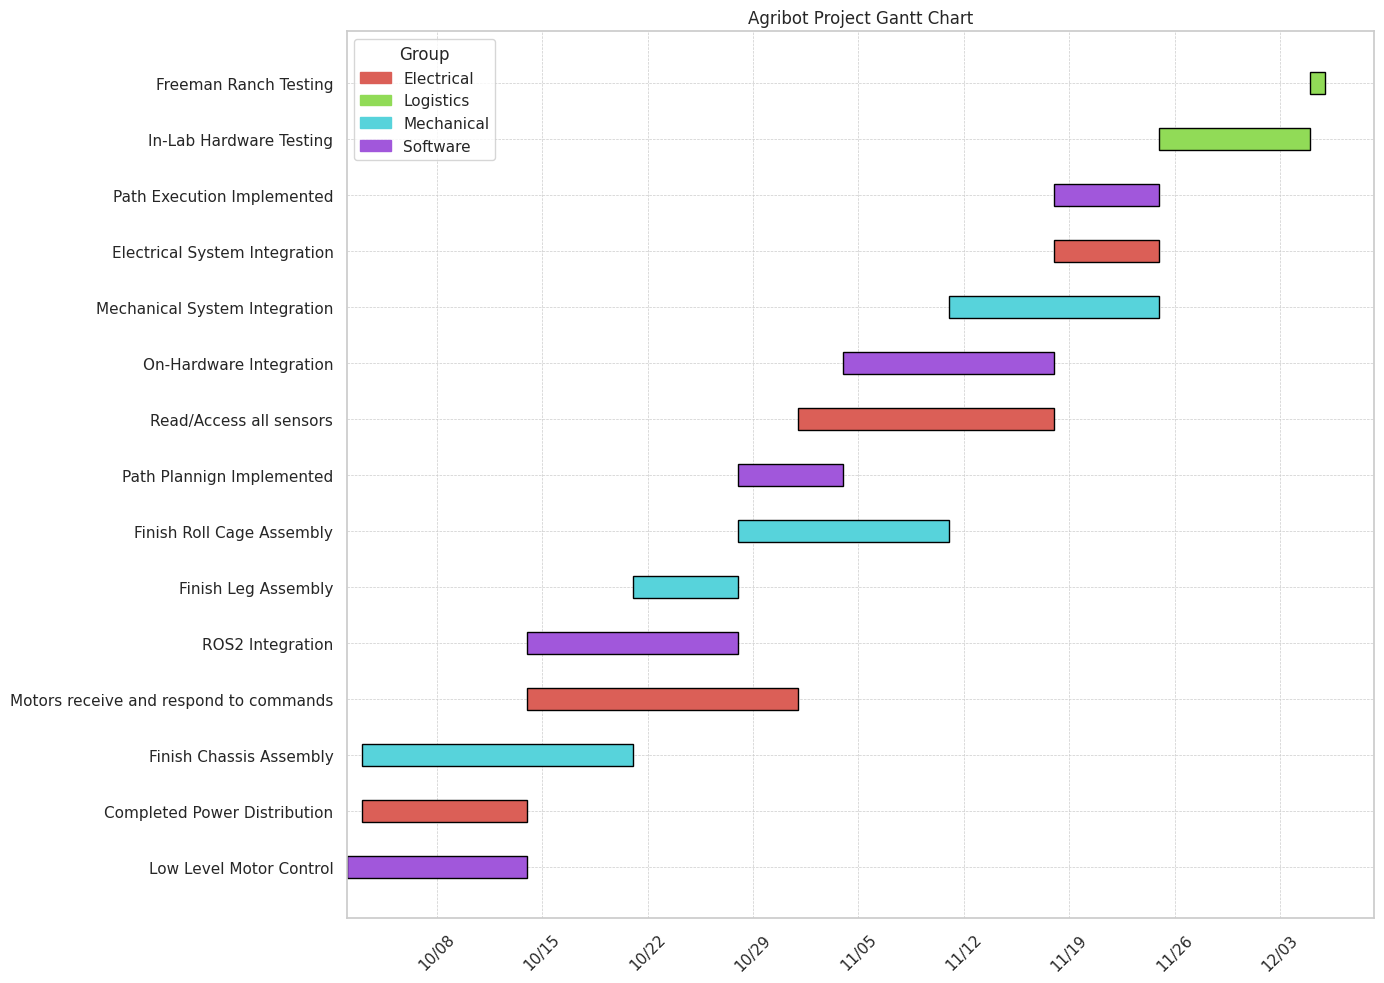

In [71]:
# @title Generate Gantt

df = sheet.as_df()
df.to_csv('timeline.csv', index = False)

# Pull in data from csv
df = pd.read_csv('timeline.csv')

# Need format: Group, Task Name, Start Date, Due Date
# NOTE: Date cols must be in long form (MM/DD/YYYY)

# Create colors mapping for each unique Group
colors = {group: color for group, color in zip(df['Group'].unique(), sns.color_palette('hls', len(df['Group'].unique())))}

sns.set(style = "whitegrid")
# sns.set(style = "")

df['Start Date'] = pd.to_datetime(df['Start Date'])
df['Due Date'] = pd.to_datetime(df['Due Date'])

# Sort based on start date
df.sort_values(by='Start Date', inplace = True)

# Assign each task a unique position on the y-axis
task_positions = {task: i for i, task in enumerate(df['Task Name'].unique())}

# Set up the figure
fig, ax = plt.subplots(figsize=(14, 10))

# Plot each task as a horizontal bar
for i, row in df.iterrows():
    start = mdates.date2num(row['Start Date'])
    end = mdates.date2num(row['Due Date'])
    ax.barh(task_positions[row['Task Name']], left=start, width=end-start, color=colors[row['Group']],
            align='center', edgecolor='black', height=0.4)

# Customize axes and labels
# ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(rotation=45)
# ax.set_ylabel('Tasks')
ax.set_yticks(list(task_positions.values()))
ax.set_yticklabels(list(task_positions.keys()))
ax.set_title('Agribot Project Gantt Chart')

# Add a legend for the groups
handles = [plt.Rectangle((0,0),1,1, color=colors[group]) for group in colors]
ax.legend(handles, colors.keys(), title='Group')

# Add grid and layout adjustments
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
